

# Train YOLOv8 Instance Segmentation on a Custom Dataset

---


In [1]:
!nvidia-smi

Fri Apr 26 12:31:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.65                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 960         On  |   00000000:01:00.0  On |                  N/A |
| 15%   51C    P8             15W /  120W |     728MiB /   4096MiB |     33%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
HOME = "/home/anshu/semantic_dataset/"

%cd {HOME}

/home/anshu/semantic_dataset


In [3]:
import numpy as np
import cv2
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.1 CPU (Intel Core(TM) i7-7700 3.60GHz)
Setup complete ✅ (8 CPUs, 7.7 GB RAM, 75.5/1006.9 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [8]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
!labelme2yolo --json_dir {HOME} --val_size 0.1 --test_size 0.15

## Custom Training

In [6]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={HOME}/dataset.yaml epochs=100 imgsz=640

/home/anshu/semantic_dataset
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.cfg' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.cfg' instead.
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.1 CPU (Intel Core(TM) i7-7700 3.60GHz)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/home/anshu/semantic_dataset//dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, prof

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml			 labels.jpg	   train_batch1620.jpg
BoxF1_curve.png			 MaskF1_curve.png  train_batch1621.jpg
BoxP_curve.png			 MaskP_curve.png   train_batch1622.jpg
BoxPR_curve.png			 MaskPR_curve.png  train_batch1.jpg
BoxR_curve.png			 MaskR_curve.png   train_batch2.jpg
confusion_matrix_normalized.png  results.csv	   val_batch0_labels.jpg
confusion_matrix.png		 results.png	   val_batch0_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  weights


/home/conex/Project_Orion


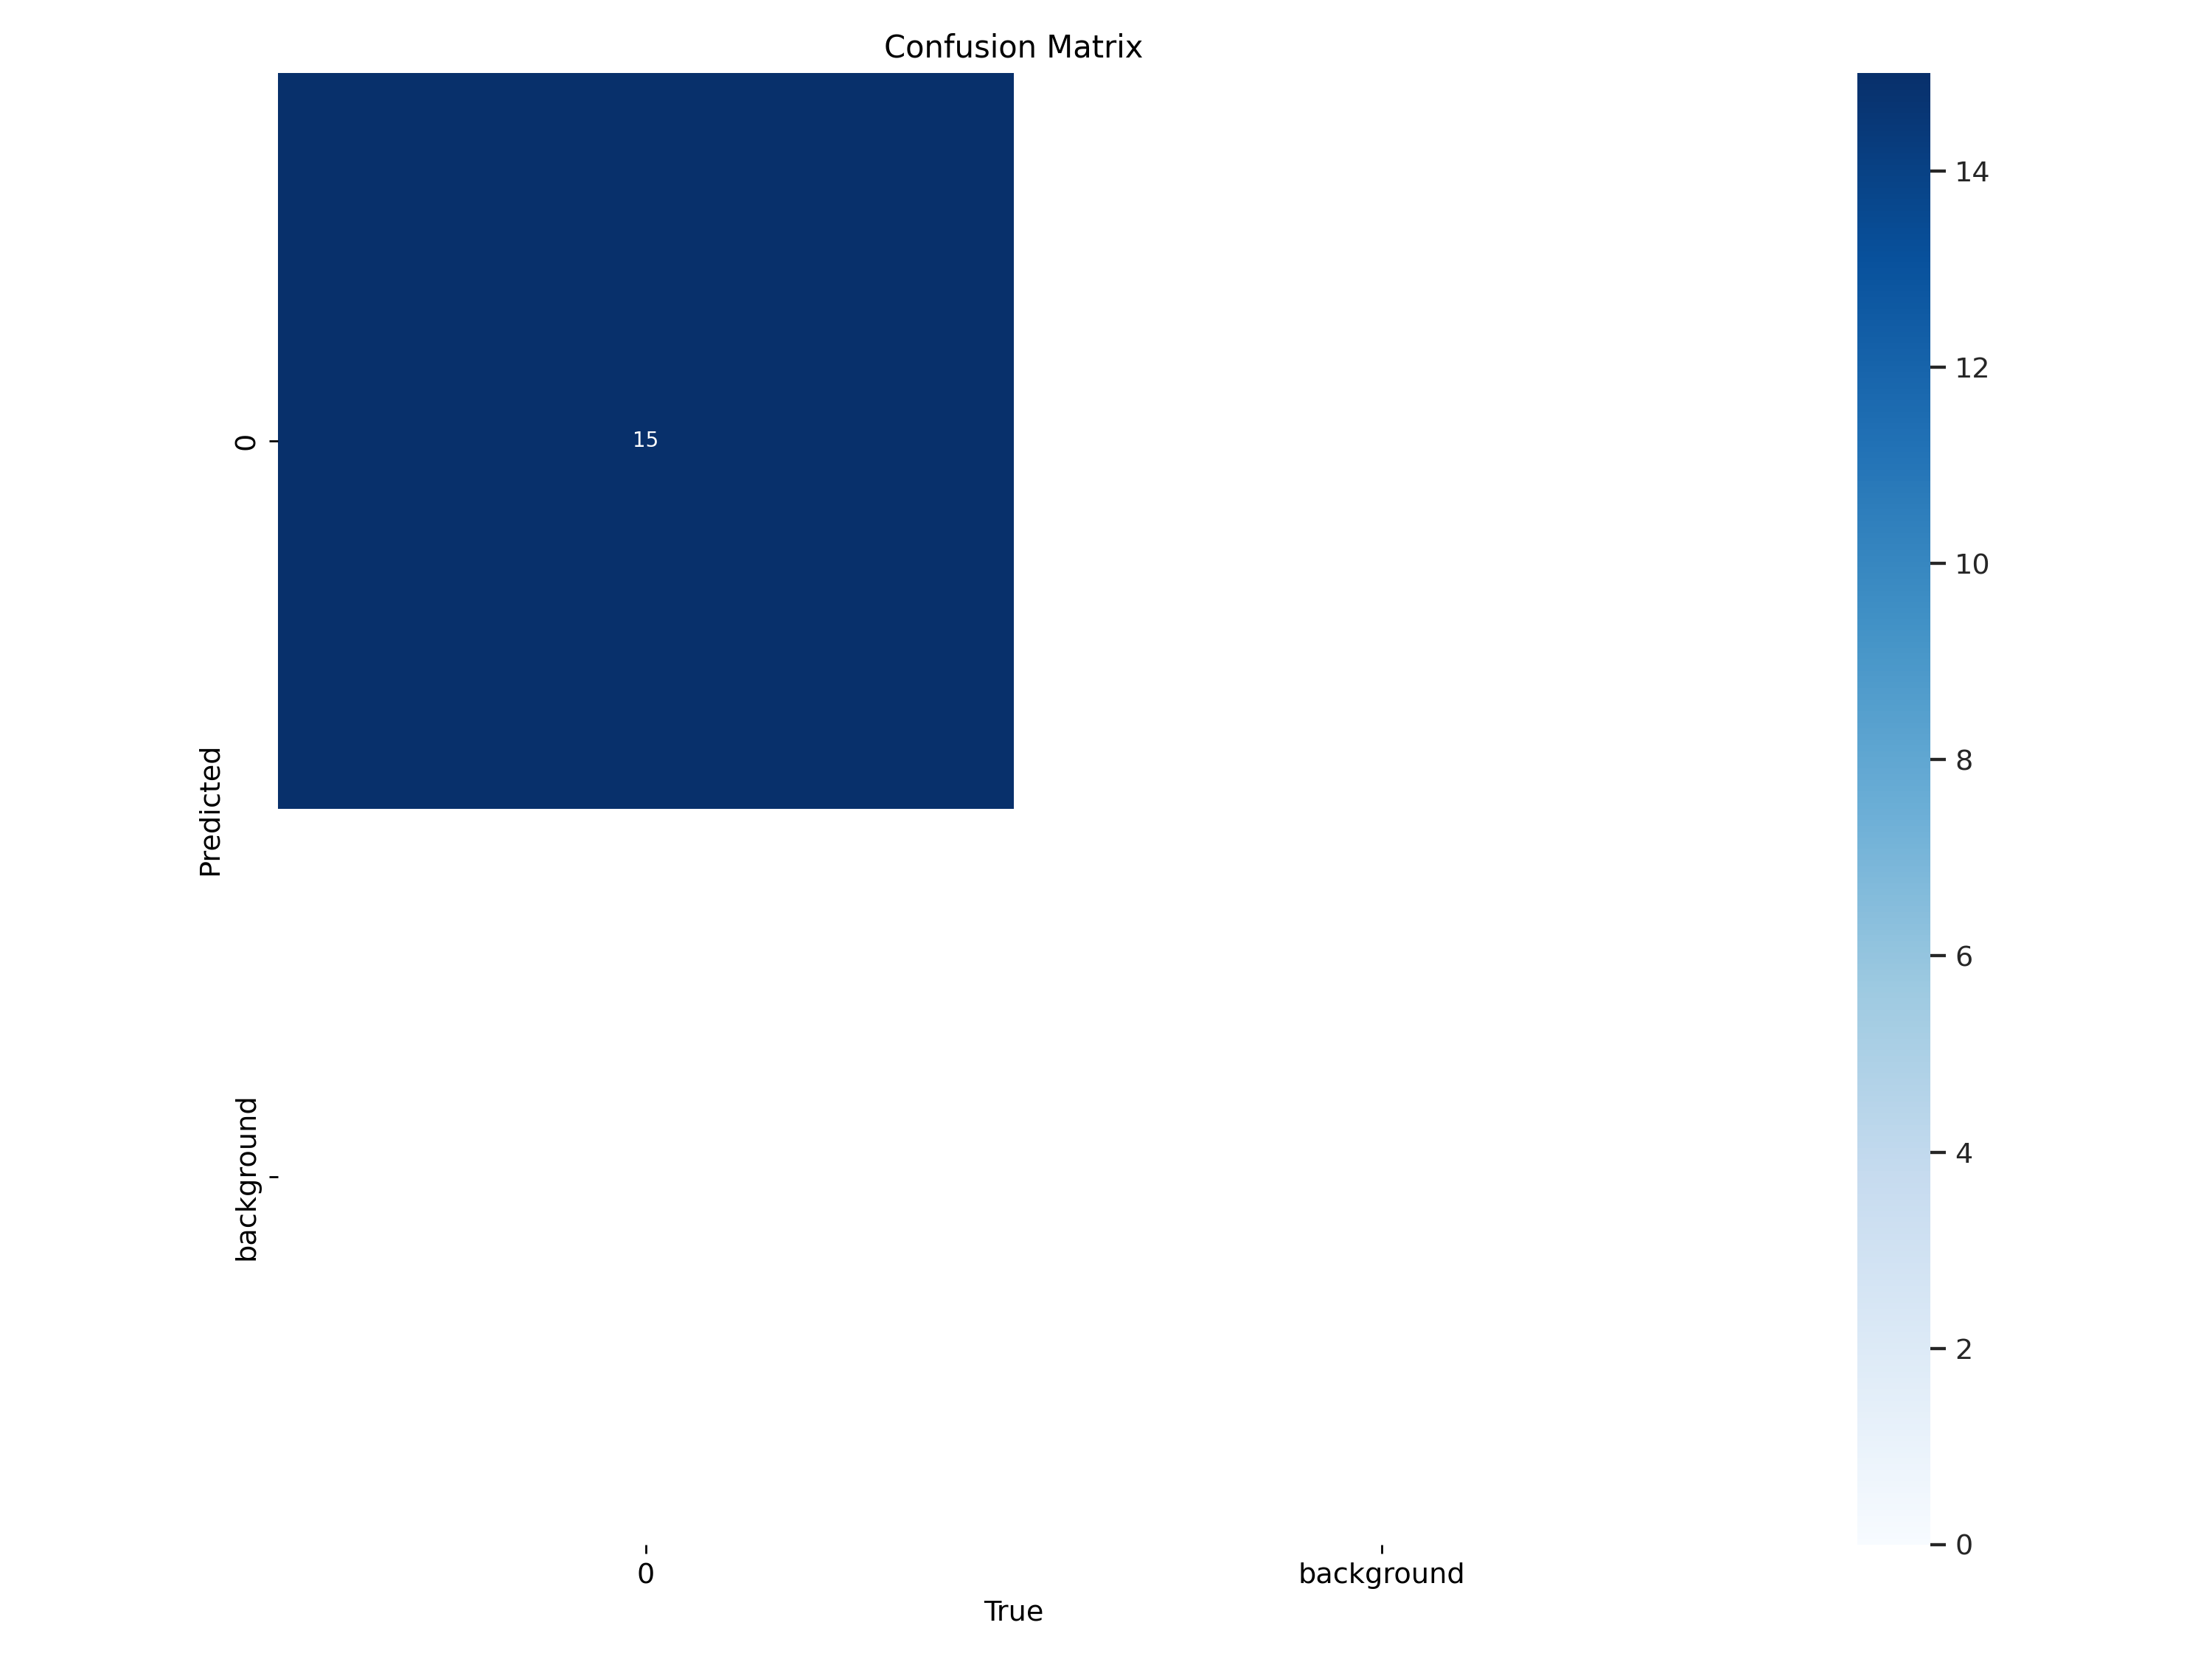

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/home/conex/Project_Orion


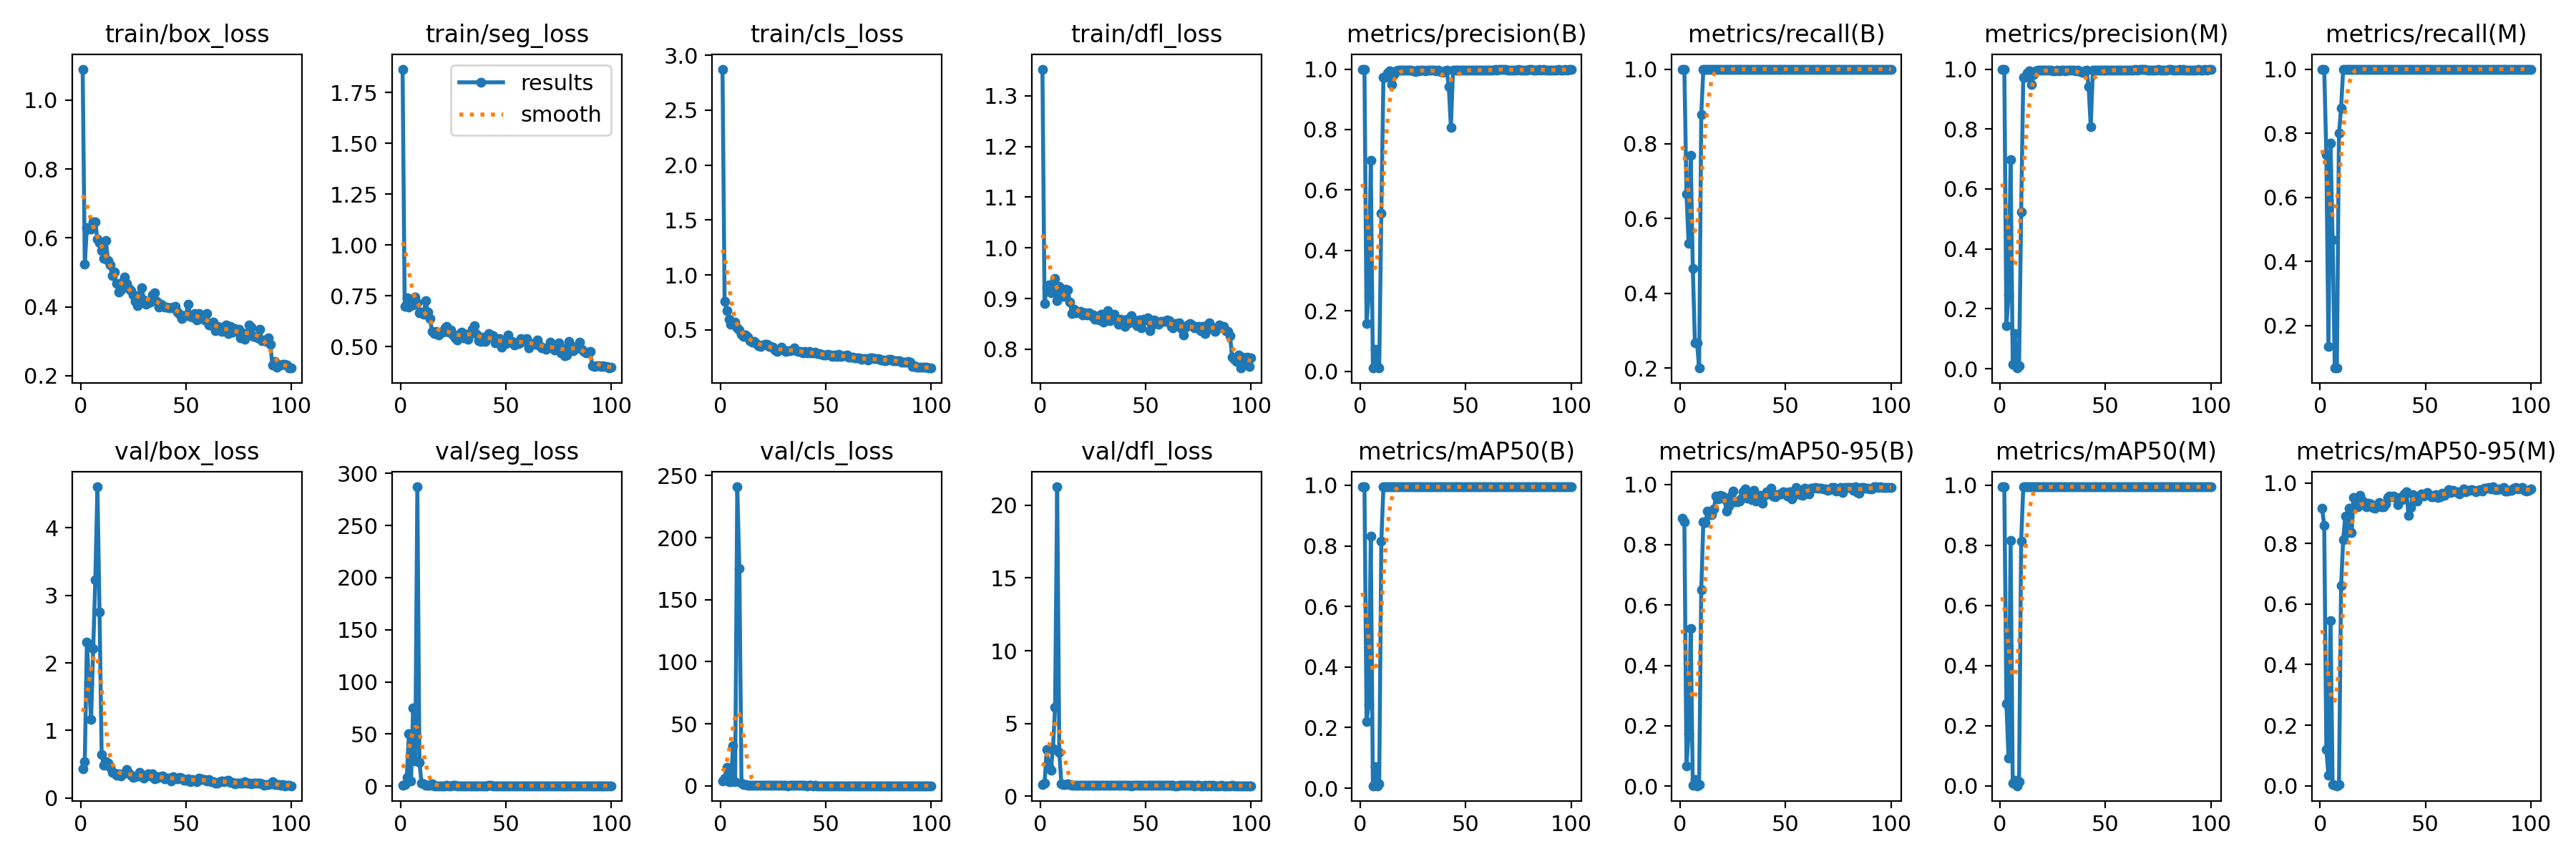

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/home/conex/Project_Orion


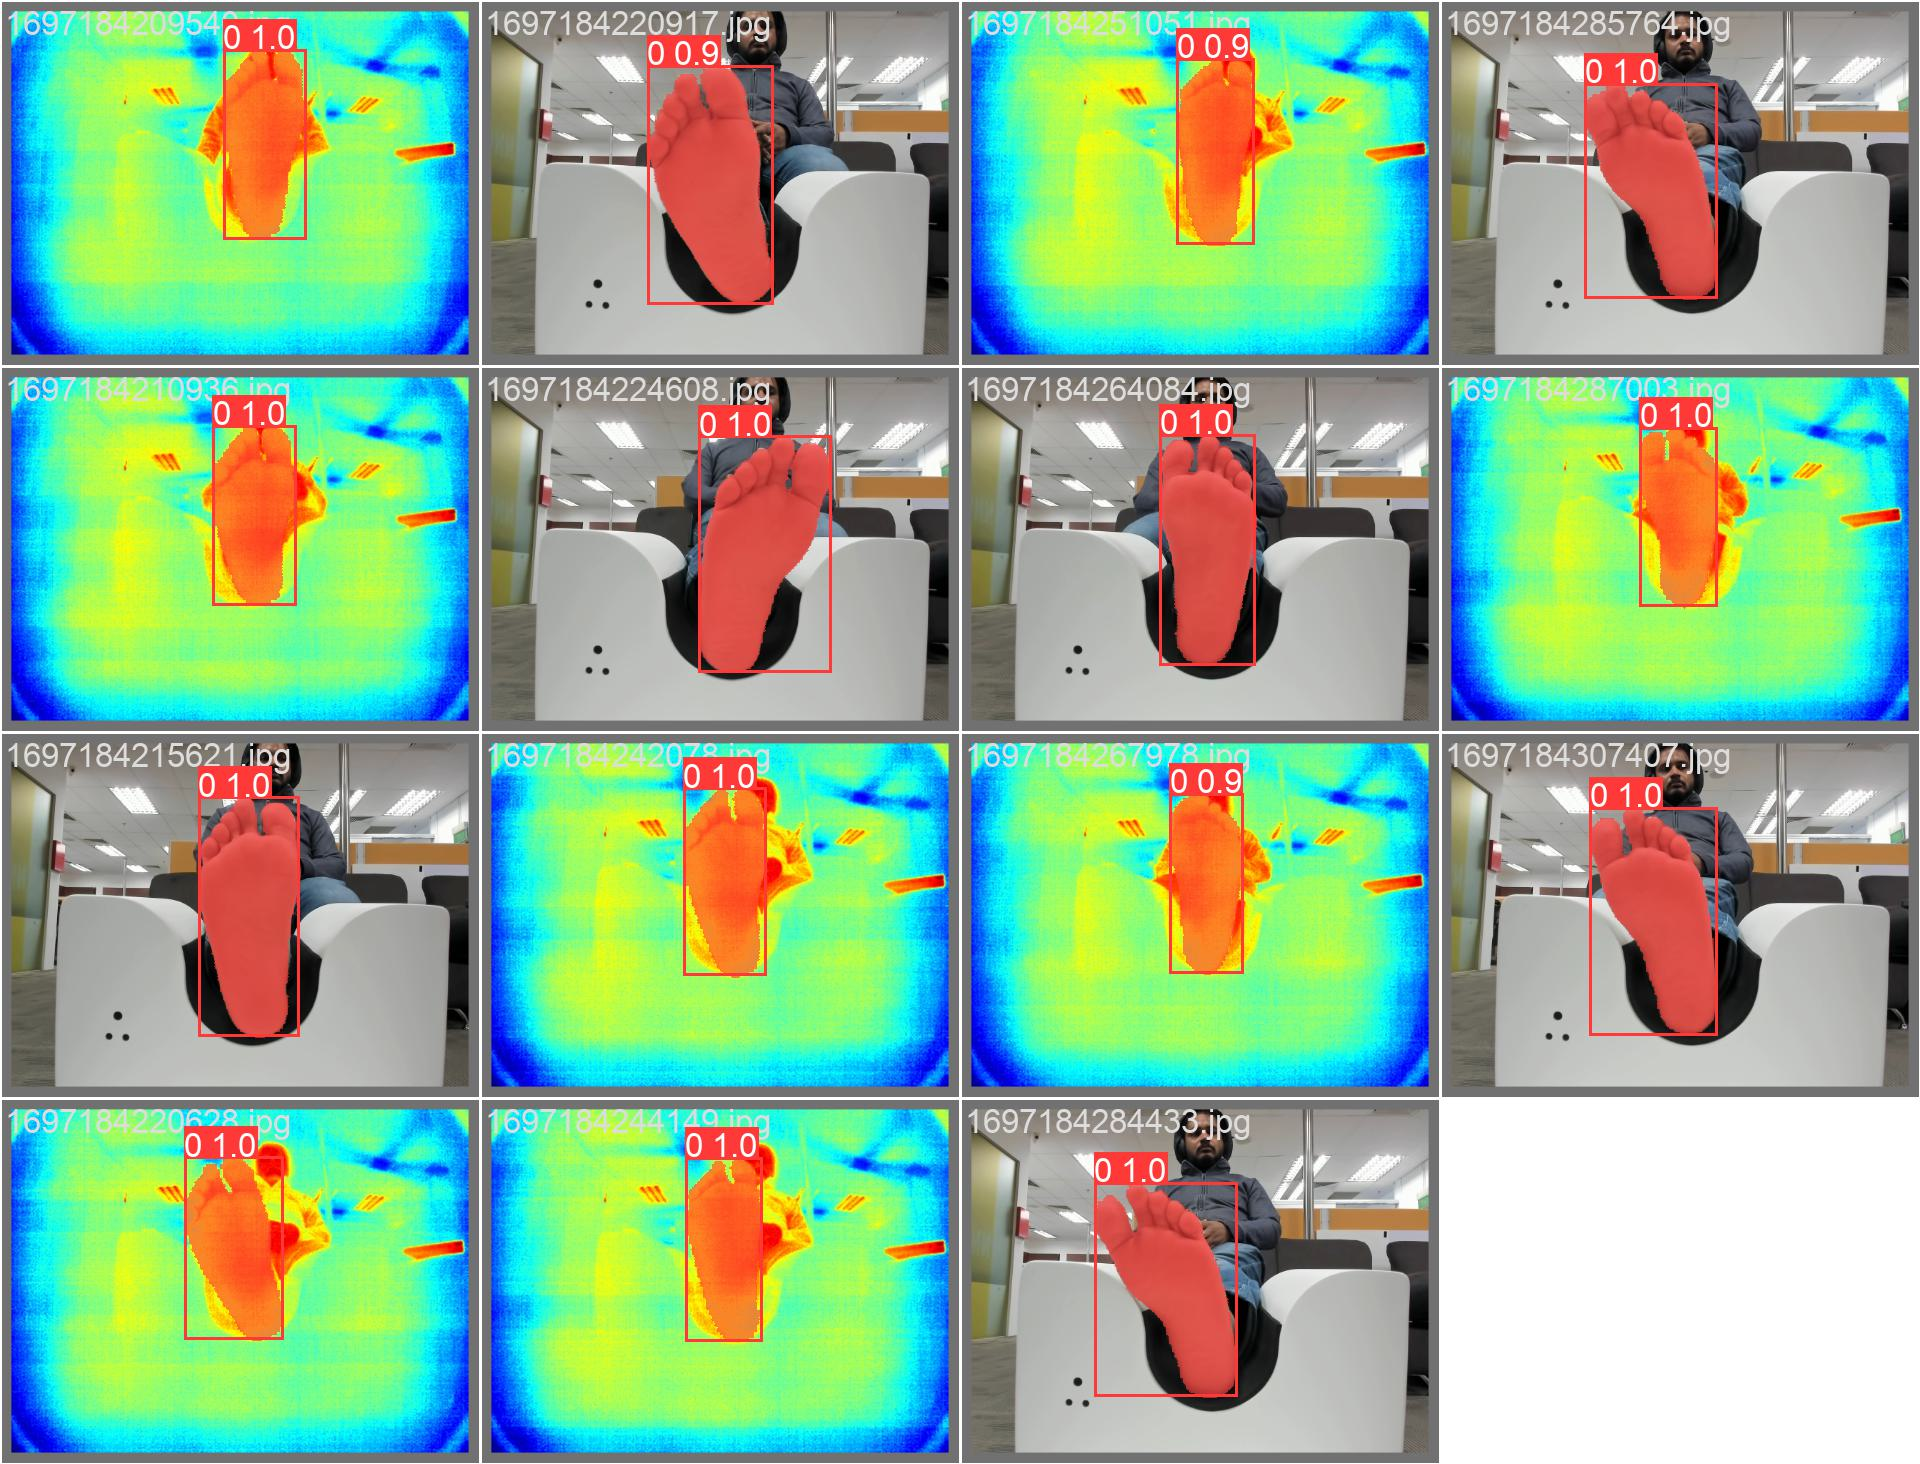

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data=/home/conex/Project_Orion/dataset/dataset.yaml

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.6 source=/home/conex/Project_Orion/dataset/images/val/ save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train3/weights/best.pt conf=0.6 source=/media/conex/DATA/presage_test_data/presage_incidents/MtE/0807/ save=true save_txt=true boxes=false